### `Project - MovieLens Data Analysis` By: Josh Isaiah

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Datasets Information:`

*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use

**`Please provide your insights wherever necessary.`**

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### 1. Import the necessary packages - 2.5 marks

In [555]:
#import libraries/packages needed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True) #add nice colorful background to the plots/graphs
import os # enable working with file path/directory



In [706]:
# Use 3 decimal places in output display
pd.set_option("display.precision", 2)

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [556]:
#your code here
#get current directory
cwd=os.getcwd()
#locate filenames movie.csv, rating.csv and user.csv in current folder
# print(cwd)
pathM =cwd+'\\movie.csv'
# print(pathM)
pathR=cwd+'\\rating.csv'
pathU=cwd+'\\user.csv'
ratingDf = pd.read_csv(pathR)   #read/load rating dataset into the ratingdDf dataframe
movieDf = pd.read_csv(pathM)    #read/load movie dataset into the moviedDf dataframe
userDf= pd.read_csv(pathU)      #read/load user dataset into the userdDf dataframe
# movieData= pd.read_csv('movie.csv')
# from google.colab import drive
# drive.mount('/content/drive')
#movieData.head()

### 3. Apply info, shape, describe, and find the number of missing values in the data. Present at least 3 observations from these operations - 2.5 marks
 - Note that you will need to do it for all the three datasets seperately

3.1: **Initial Review of Rating Dataset**

In [557]:
# summary information about ratingDf
ratingDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [558]:
# shape of ratingDf
ratingDf.shape

(100000, 4)

In [559]:
# describe function to analyze 5 point summary of ratingDf
ratingDf.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
movie id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0


In [560]:
# if there are Nan, or Null calculate how many
print('Checking for all Null values \n',ratingDf.isnull().sum())
print('\n Checking for all NaN values \n',ratingDf.isna().sum())

Checking for all Null values 
 user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

 Checking for all NaN values 
 user id      0
movie id     0
rating       0
timestamp    0
dtype: int64


In [561]:
ratingDf.isna()

,user id,movie id,rating,timestamp
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
99995,False,False,False,False
99996,False,False,False,False
99997,False,False,False,False
99998,False,False,False,False


3.1.1: **Rating dataset Observations**
*   All the columns are integer data type, including the timestamp data
*   Based on the information summary, the isnull and isna codes there are no null or Nan inputs in the rating dataset
*   Rating and user id should all be a categorical data type, but currently loaded into the dataframe as integer
*   There are 100,000 rows/records and 4 columns/fields
*   25% of the ratings are below 3.0, while 50% are 4.0. Also 25% are above 4.0 or 75% are below 4.0







3.2: **Initial Review of Movie Dataset**




In [562]:
# summary information about movieDf
movieDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [563]:
# shape of movieDf
movieDf.shape

(1681, 22)

In [564]:
# describe function to analyze 5 point summary of movieDf
movieDf.describe().T

,count,mean,std,min,25%,50%,75%,max
movie id,1681.0,841.841761,485.638077,1.0,422.0,842.0,1262.0,1682.0
unknown,1681.0,0.000595,0.024390,0.0,0.0,0.0,0.0,1.0
Action,1681.0,0.149316,0.356506,0.0,0.0,0.0,0.0,1.0
Adventure,1681.0,0.080309,0.271852,0.0,0.0,0.0,0.0,1.0
Animation,1681.0,0.024985,0.156126,0.0,0.0,0.0,0.0,1.0
Childrens,1681.0,0.072576,0.259516,0.0,0.0,0.0,0.0,1.0
Comedy,1681.0,0.300416,0.458576,0.0,0.0,0.0,1.0,1.0
Crime,1681.0,0.064842,0.246321,0.0,0.0,0.0,0.0,1.0
Documentary,1681.0,0.029744,0.169931,0.0,0.0,0.0,0.0,1.0
Drama,1681.0,0.431291,0.495404,0.0,0.0,0.0,1.0,1.0


In [565]:
movieDf.isna().T #check for NaN

,0,1,2,3,4,5,6,7,8,9,...,1671,1672,1673,1674,1675,1676,1677,1678,1679,1680
movie id,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
movie title,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
release date,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
unknown,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Action,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Adventure,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Animation,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Childrens,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Comedy,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Crime,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [566]:
# if there are Nan, or Null calculate how many
print('Checking for all Null values \n',movieDf.isnull().sum())
print('\n Checking for all NaN values \n',movieDf.isna().sum())

Checking for all Null values 
 movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

 Checking for all NaN values 
 movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64


3.2.1: **Movie dataset Observations**
*   Unlike the rating dataset, the movie data set have 2 columns/field with object data type
*   Based on the information summary, the isnull and isna codes there are no null or Nan inputs in the movie dataset
*   The genres should be all be a categorical data type, but currently loaded into the dataframe as integer
*   There are 1,681 rows/records and 22 columns/fields
*   Because the genres are setup for a categorical data type, the 5 point summary data is not that useful here

3.3: **Initial Review of User Dataset**




In [567]:
# summary information about userDf
userDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [568]:
# shape of userDf
userDf.shape

(943, 5)

In [569]:
# describe function to analyze 5 point summary of userDf
userDf.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,943.0,472.000000,272.364951,1.0,236.5,472.0,707.5,943.0
age,943.0,34.051962,12.192740,7.0,25.0,31.0,43.0,73.0


In [570]:
userDf.isna().T #check for NaN

,0,1,2,3,4,5,6,7,8,9,...,933,934,935,936,937,938,939,940,941,942
user id,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
age,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
gender,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
occupation,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
zip code,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [571]:
# if there are Nan, or Null calculate how many
print('Checking for all Null values \n',userDf.isnull().sum())
print('\n Checking for all NaN values \n',userDf.isna().sum())

Checking for all Null values 
 user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

 Checking for all NaN values 
 user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64


         count        mean         std  min    25%    50%    75%    max
user id  943.0  472.000000  272.364951  1.0  236.5  472.0  707.5  943.0
age      943.0   34.051962   12.192740  7.0   25.0   31.0   43.0   73.0 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None


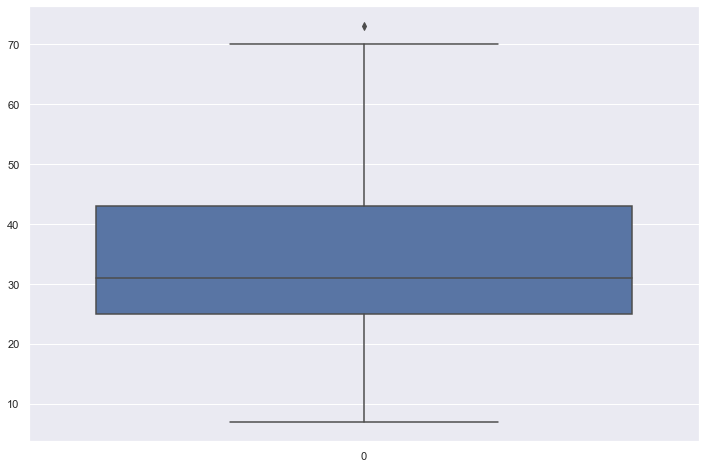

In [572]:
print(userDf.describe().T,'\n\n\n')
print(userDf.info())
plt.figure(figsize=(12,8))
sns.boxplot(data=userDf['age'],orient='v');

3.3.1: **User dataset Observations**
*   3 object data type and 2 int. data type.
*   5 point summary about age gives us a clearer picture and better analysis
*   Based on the information summary, the isnull and isna codes there are no null or NaN in the user dataset
*   Data type is better classified compared to the previous two (movie and ratings datasets)
*   There are 943 rows/records and 5 columns/fields
*   The average age of the users is ~34 years,the youngest is 7yrs while the oldest is 73 yrs.
*   Dataset is slighly skewed to the right with 1 outlier

### 4. Find the number of movies per genre using the item data - 2.5 marks

In [573]:
#your code here
#Code to find number of movies per genre
# extract the genre columns
# genreCol = pd.Series(data=movieDf.columns)
# genreCol
# genreCol=genreCol.drop([0,1,2])
# print(genreCol)
# genreLabel = genreCol.values
# print(genreLabel)
# newDf=pd.DataFrame(movieDf([genreLabel]))
# newDf
# print('Genre Type    No. of Movies \n',movieDf[genreLabel].sum())
#OR
#remove the object data type by slicing so we can compute the sum on the int. 
print('Genre Type    No. of Movies/Genre\n',movieDf.iloc[:,3:].sum()) 

Genre Type    No. of Movies/Genre
 unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64


**Insights:**

Total number of Drama genre released was the highest, 725, with Comedy coming second at 505. Looked through the data to ensure that the Action and Thriller are not same input but different genre, confirms that they happen to have equal number of released movies.  Unknown genre has 1, which will might create an outlier situation in the dataset


### 5. Drop the movie where the genre is unknown - 2.5 marks

In [574]:
#your code here
movieDf.head()
movieDf1=movieDf.drop(labels=['unknown'],axis=1) #create a copy of the original data and drop the unkown genre
movieDf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   Action        1681 non-null   int64 
 4   Adventure     1681 non-null   int64 
 5   Animation     1681 non-null   int64 
 6   Childrens     1681 non-null   int64 
 7   Comedy        1681 non-null   int64 
 8   Crime         1681 non-null   int64 
 9   Documentary   1681 non-null   int64 
 10  Drama         1681 non-null   int64 
 11  Fantasy       1681 non-null   int64 
 12  Film-Noir     1681 non-null   int64 
 13  Horror        1681 non-null   int64 
 14  Musical       1681 non-null   int64 
 15  Mystery       1681 non-null   int64 
 16  Romance       1681 non-null   int64 
 17  Sci-Fi        1681 non-null   int64 
 18  Thriller      1681 non-null   int64 
 19  War   

**Insights:**
Created a new dataframe to help remove and clean up the original data after dropping the unknown genre. The movie dataset now has 21 columns/fields compared to the original dataset of 22. All other data structure remains the same.

### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [582]:
#your code here
# movieDf1.set_index('movie id')
movieDf1.iloc[:,3:].sum(axis=1) # i had to use iloc because panda was adding up the index when i use sum(axis=1)
# D=movieDf1[movieDf1['movie title'].value_counts()>1]
# movieDf1['movie title'].value_counts()>1
# D
# data[0:1658]
# D=pd.concat([data.index.,columns=['movie title','No of genres'])
# movieDf1
# movieDf1.sum(axis=0)
# genres_numbers=movieDf1.sum(axis=1)
# genres_numbers
# movieDf1[movieDf1.sum(axis=1)>1]
movieDf1['genres_numbers']=movieDf1.iloc[:,3:].sum(axis=1)
movieDf1.columns

Index(['movie id', 'movie title', 'release date', 'Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'genres_numbers'],
      dtype='object')

**Display Movie name and number of genres for the movie in dataframe**

In [583]:
#Display Movie name and number of genres for the movie in dataframe

movieDf1[['movie title','genres_numbers']]

,movie title,genres_numbers
0,Toy Story,6
1,GoldenEye,6
2,Four Rooms,2
3,Get Shorty,6
4,Copycat,6
...,...,...
1676,Mat' i syn,2
1677,B. Monkey,4
1678,Sliding Doors,4
1679,You So Crazy,2


**total number of movies with greater than 1 genre**

In [584]:
# total number of movies with >1 genre
movieDf1[movieDf1['genres_numbers']>1]

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genres_numbers
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,6
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,6
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
3,4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,4
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2


In [585]:
movieDf1['genres_numbers'].describe()

count    1681.000000
mean        3.439619
std         1.738246
min         0.000000
25%         2.000000
50%         4.000000
75%         4.000000
max        12.000000
Name: genres_numbers, dtype: float64

In [586]:
movieDf1[movieDf1['genres_numbers']>5]

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genres_numbers
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,6
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,6
3,4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
4,5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,6
7,8,Babe,01-Jan-1995,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606,1608,Buddy,06-Jun-1997,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1608,1610,"Truth or Consequences, N.M.",02-May-1997,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,6
1613,1615,Warriors of Virtue,02-May-1997,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,8
1645,1647,Hana-bi,20-Mar-1998,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,6


**Insights:**
* Outputs should be properly vetted with this analysis. Panda was adding the movie id column to the sum of total genre per movie
* There are a total of 849 movies that appeared in more than one genre
* Max. number of movies that appeared in more than one genre is 6
* Three (3) movies were present in six (6) genres


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age and countplot for release year, ratings, *

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [587]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


**7.1 Univariate plot of Rating**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


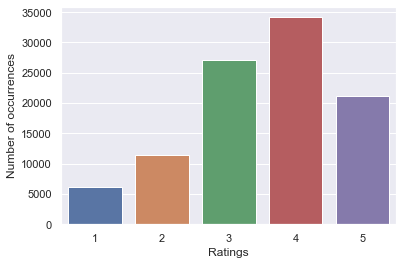

In [588]:
#your code here
#userDf.head()
ratingplot=sns.countplot(ratingDf['rating']); #countplot to plot the ratings
ratingplot.set(xlabel='Ratings', ylabel='Number of occurrences');#usign matplotlib package to display the x & y axis

**7.2 Univariate plot of Age**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


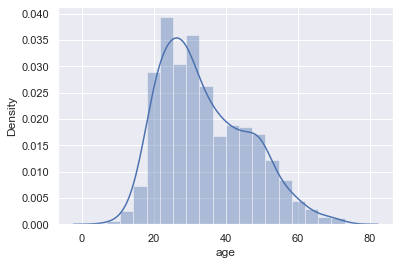

In [589]:
sns.distplot(userDf['age']);

**7.3 Univariate plot of Gender**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


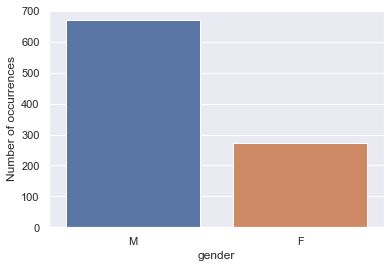

In [590]:
genderplot=sns.countplot(userDf['gender']); 
genderplot.set(xlabel='gender', ylabel='Number of occurrences');#usign matplotlib package to display the x & y axis

**7.4 Univariate plot of Occupation**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


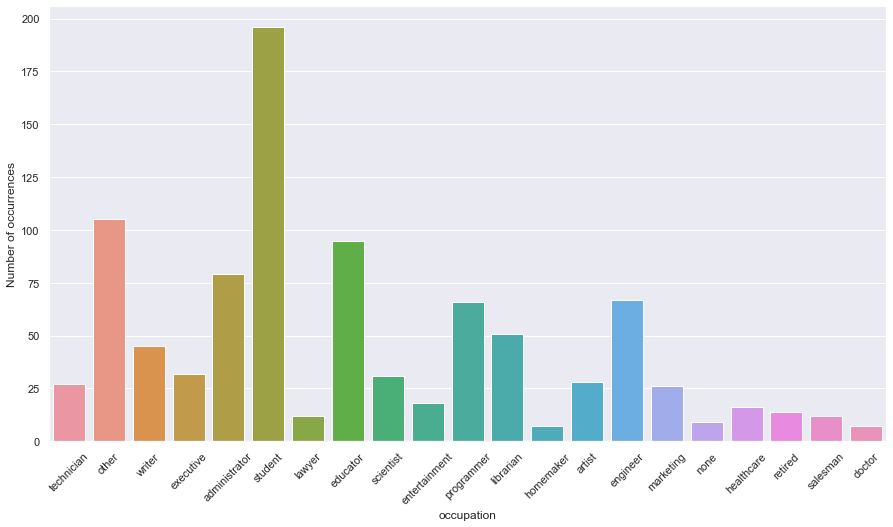

In [591]:
sns.set({'figure.figsize': (15,8)})
occupation_plot=sns.countplot(userDf['occupation']); 
occupation_plot.set_xticklabels(occupation_plot.get_xticklabels(),rotation=45); # adjust the x-axis label orientation
occupation_plot.set(xlabel='occupation', 
                    ylabel='Number of occurrences');#usign matplotlib package to display the x & y axis

**7.5 Univariate plot of Release Year**

In [592]:
#convert the release date to a datetime dtype
movieDf1['release date'] = pd.to_datetime(movieDf1['release date'])

In [593]:
movieDf1.info() #check if datatype has been changed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   movie id        1681 non-null   int64         
 1   movie title     1681 non-null   object        
 2   release date    1681 non-null   datetime64[ns]
 3   Action          1681 non-null   int64         
 4   Adventure       1681 non-null   int64         
 5   Animation       1681 non-null   int64         
 6   Childrens       1681 non-null   int64         
 7   Comedy          1681 non-null   int64         
 8   Crime           1681 non-null   int64         
 9   Documentary     1681 non-null   int64         
 10  Drama           1681 non-null   int64         
 11  Fantasy         1681 non-null   int64         
 12  Film-Noir       1681 non-null   int64         
 13  Horror          1681 non-null   int64         
 14  Musical         1681 non-null   int64         
 15  Myst

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


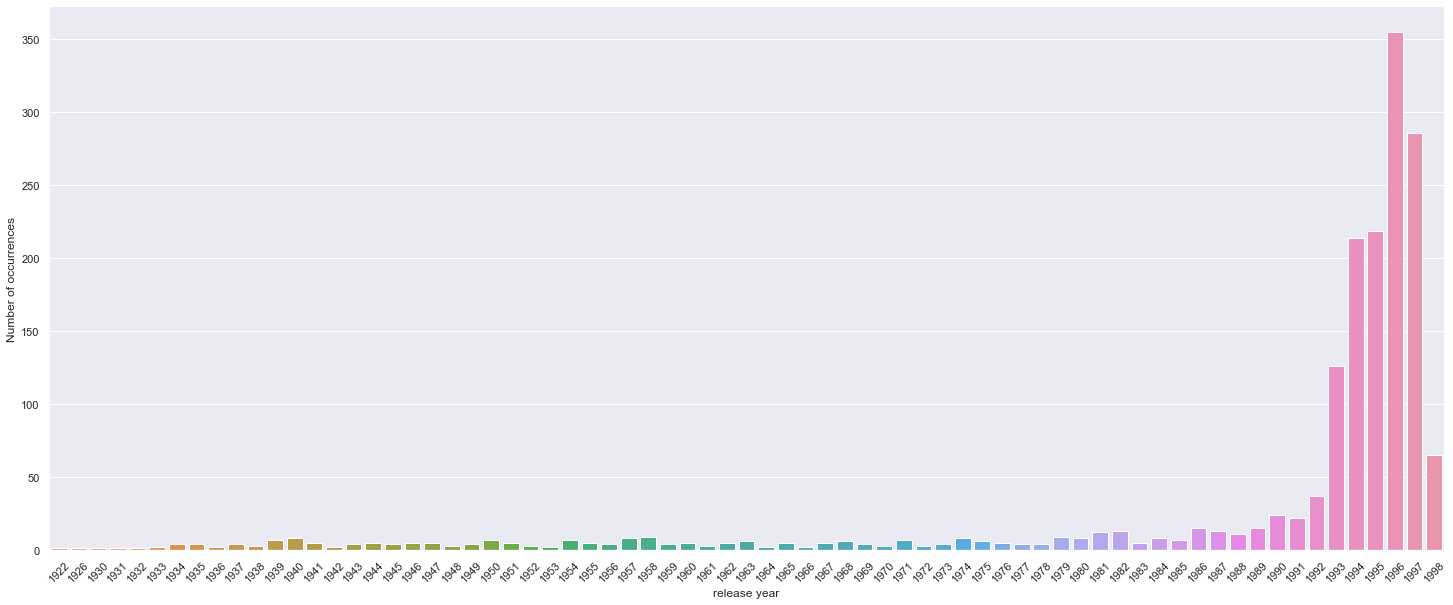

In [594]:
sns.set({'figure.figsize': (25,10)})
year_plot=sns.countplot(movieDf1['release date'].dt.year) # extract the year value from the converted release date col.
year_plot.set_xticklabels(year_plot.get_xticklabels(),rotation=45); # adjust the x-axis label orientation
year_plot.set(xlabel='release year', 
                    ylabel='Number of occurrences');#usign matplotlib package to display the x & y axis

In [596]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use item dataset to get count of movies released in a particular year, store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.

In [597]:
#your code here
movieDf2=movieDf1 # create a new data set
movieDf2['release year']=movieDf1['release date'].dt.year # create a new column, release year
movieDf2
# movieDf1['release year']=movieDf1['release date'].dt.year

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genres_numbers,release year
0,1,Toy Story,1995-01-01,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,6,1995
1,2,GoldenEye,1995-01-01,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,6,1995
2,3,Four Rooms,1995-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2,1995
3,4,Get Shorty,1995-01-01,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,6,1995
4,5,Copycat,1995-01-01,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,6,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,1998-02-06,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,1998
1677,1679,B. Monkey,1998-02-06,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,4,1998
1678,1680,Sliding Doors,1998-01-01,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,4,1998
1679,1681,You So Crazy,1994-01-01,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,2,1994


In [598]:
movieDf2.set_index('release year',inplace=True) #make release year the new index
movieDf2

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genres_numbers
release year,,,,,,,,,,,,,,,,,,,,,
1995,1,Toy Story,1995-01-01,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,6
1995,2,GoldenEye,1995-01-01,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,6
1995,3,Four Rooms,1995-01-01,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
1995,4,Get Shorty,1995-01-01,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
1995,5,Copycat,1995-01-01,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,1678,Mat' i syn,1998-02-06,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1998,1679,B. Monkey,1998-02-06,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,4
1998,1680,Sliding Doors,1998-01-01,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4


In [599]:
movieDf2.drop('movie id',axis=1,inplace=True) # remove movie id, movie title, and release date from new dataset
movieDf2.drop('movie title',axis=1,inplace=True)
movieDf2.drop('release date',axis=1,inplace=True)
movieDf2

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,genres_numbers
release year,,,,,,,,,,,,,,,,,,,
1995,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6
1995,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,6
1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2
1995,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,6
1995,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1998,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
1998,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,4
1998,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,4


In [600]:
movieDf2.drop('genres_numbers',axis=1,inplace=True)

In [601]:
# Get the total movie release in a year per genre
# movieDf2.groupby(['release year'])[['Action','Comedy']].sum().sort_values(by='Action', ascending=False)
movieDf2.groupby(['release year'])[movieDf2.columns].sum().sort_values(by='Action', ascending=False) 
# new_column=movieDf2.columns
# del new_column[-1]
# new_column.drop('genres_numbers',inplace=True)
# new_column.delete()
# new_column

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,
1997,46,20,3,22,87,30,6,113,4,2,8,5,18,51,13,54,14,0
1996,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2
1995,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1994,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1993,20,9,1,6,39,7,4,64,0,1,5,2,6,16,8,17,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1958,0,1,0,0,1,1,0,4,0,1,1,1,1,0,1,2,0,1
1960,0,1,0,2,2,1,0,2,0,0,1,0,0,1,0,2,0,0
1961,0,0,0,1,0,0,0,2,0,0,0,0,0,1,0,1,0,0


In [605]:
movieDf3=movieDf2.groupby(['release year'])[movieDf2.columns].sum().sort_values(by='release year', ascending=False) # create a dataframe to retain the new total after grouping
movieDf3['total_ym']=movieDf3.sum(axis=1)
# movieDf3
#(df.div(df['total'], axis= 0) * 100)
mdf4=(movieDf3.div(movieDf3['total_ym'], axis= 0) * 100) #normalize with the total
mdf4
# sns.heatmap(movieDf3.div(movieDf3['total_ym'], axis= 0) * 100)

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total_ym
release year,,,,,,,,,,,,,,,,,,,
1998,10.256410,2.564103,0.000000,0.854701,11.111111,5.982906,2.564103,28.205128,0.854701,1.709402,3.418803,0.854701,2.564103,9.401709,4.273504,15.384615,0.000000,0.000000,100.0
1997,9.274194,4.032258,0.604839,4.435484,17.540323,6.048387,1.209677,22.782258,0.806452,0.403226,1.612903,1.008065,3.629032,10.282258,2.620968,10.887097,2.822581,0.000000,100.0
1996,7.871199,4.293381,1.610018,3.756708,19.320215,3.756708,3.220036,30.411449,1.073345,0.178891,1.967800,1.610018,1.073345,6.797853,2.683363,8.407871,1.610018,0.357782,100.0
1995,10.498688,5.774278,1.574803,5.511811,16.535433,2.887139,1.312336,23.359580,0.787402,0.262467,3.674541,0.787402,1.312336,9.711286,3.937008,10.236220,1.312336,0.524934,100.0
1994,8.498584,3.682720,1.133144,4.249292,23.229462,2.266289,2.549575,27.478754,0.849858,0.000000,2.266289,0.566572,0.566572,9.915014,1.983003,7.082153,1.983003,1.699717,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000,100.0
1931,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,100.0
1930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.0


In [606]:
mdf4.drop('total_ym',axis=1,inplace=True) #remove total to enable us plot heatmap
mdf4

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,
1998,10.256410,2.564103,0.000000,0.854701,11.111111,5.982906,2.564103,28.205128,0.854701,1.709402,3.418803,0.854701,2.564103,9.401709,4.273504,15.384615,0.000000,0.000000
1997,9.274194,4.032258,0.604839,4.435484,17.540323,6.048387,1.209677,22.782258,0.806452,0.403226,1.612903,1.008065,3.629032,10.282258,2.620968,10.887097,2.822581,0.000000
1996,7.871199,4.293381,1.610018,3.756708,19.320215,3.756708,3.220036,30.411449,1.073345,0.178891,1.967800,1.610018,1.073345,6.797853,2.683363,8.407871,1.610018,0.357782
1995,10.498688,5.774278,1.574803,5.511811,16.535433,2.887139,1.312336,23.359580,0.787402,0.262467,3.674541,0.787402,1.312336,9.711286,3.937008,10.236220,1.312336,0.524934
1994,8.498584,3.682720,1.133144,4.249292,23.229462,2.266289,2.549575,27.478754,0.849858,0.000000,2.266289,0.566572,0.566572,9.915014,1.983003,7.082153,1.983003,1.699717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1932,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000
1931,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000,0.000000,0.000000,0.000000,33.333333,0.000000,0.000000
1930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


**Visualization of how popularity of genres has changed over the years**

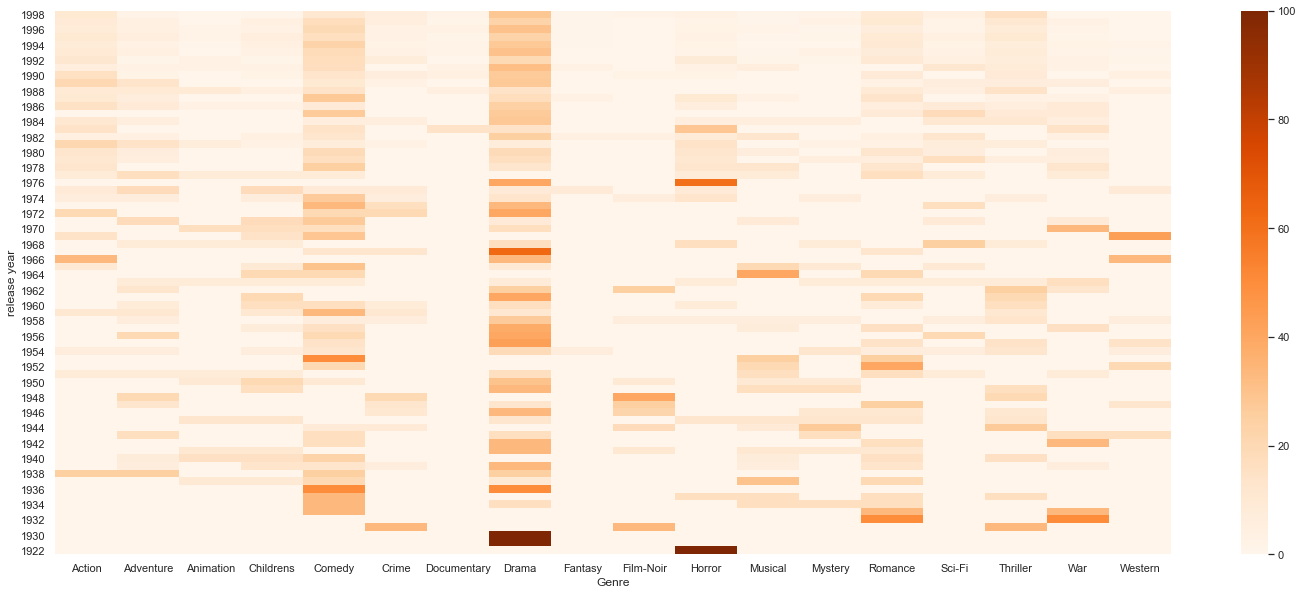

In [607]:
visual=sns.heatmap(mdf4,cmap="Oranges" );
visual.set(ylabel='release year',xlabel='Genre');#usign matplotlib package to display the x & y axis

**Insights:**
* Drama genre has reduced over the year. It started dropping right after 1930s
* Action genre was not as much in the early years, but started increasing from 1966
* Comedy seem to be fairly consistent over the time period. Which is expected because comedy always adapt from generation to generation
* Documentary took off from the 1980s. This could be due to technology development to document happenings and history
* Romance was just like comedy. Was fairly consistent


### 9. Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [415]:
#your code here
#count of ratings and average of ratings
ratingDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


**perform merge of movie and ratings**

In [663]:
#perform merge of movie and ratings
mdf5=movieDf
rf1=ratingDf

In [665]:
rf1.head()

,index,movie id,rating,timestamp
user id,,,,
196,0,242,3,881250949
186,1,302,3,891717742
22,2,377,1,878887116
244,3,51,2,880606923
166,4,346,1,886397596


In [669]:
mdf5.drop(['unknown'],axis=1,inplace=True)
mdf5.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [670]:
mdf5.set_index('movie id',inplace=True)
rf1.set_index('movie id',inplace=True)

In [671]:
#merge both data
# rf1.sort_values(by='movie id',ascending=True,inplace=True)
mdrf=mdf5.join(rf1,how='inner')

9.1.1 Find the count of ratings and average ratings for every movie.

In [672]:
# Counts of each ratings
print(mdrf.groupby(['movie title'])['rating'].count())
# print('Ratings  Total\n',ratingDf['rating'].value_counts())

movie title
'Til There Was You                   9
1-900                                5
101 Dalmatians                     109
12 Angry Men                       125
187                                 41
                                  ... 
Young Guns                         101
Young Guns II                       44
Young Poisoner's Handbook, The      41
Zeus and Roxanne                     6
Á köldum klaka (Cold Fever)          1
Name: rating, Length: 1658, dtype: int64


9.1.2 Find the count of ratings and average ratings for every movie.

In [673]:
#average ratings for every movie
# ratingDf.groupby(['movie id'])['rating'].mean()
print(mdrf.groupby(['movie title'])['rating'].mean())

movie title
'Til There Was You                 2.333333
1-900                              2.600000
101 Dalmatians                     2.908257
12 Angry Men                       4.344000
187                                3.024390
                                     ...   
Young Guns                         3.207921
Young Guns II                      2.772727
Young Poisoner's Handbook, The     3.341463
Zeus and Roxanne                   2.166667
Á köldum klaka (Cold Fever)        3.000000
Name: rating, Length: 1658, dtype: float64


9.2 Slice the movies which have ratings more than 100.

In [674]:
# ratingDf.groupby('movie id')['rating'].sum()>100 #['movie id']'movie id')['rating'].sum()>100]
# ratingDf.groupby(['movie id'])['rating'].sum()>100
# # ratingDf.info()
# # newratingDf1=pd.merge(movieDf,ratingDf, on='movie id',how='inner')
# movieDf
# mdf5=movieDf
# mdf5.drop('unknown',axis=1,inplace=True)
# mdf5
# df.groupby(['movie id'])['rating'].sum()>100
# df[df.groupby(['movie id'])['rating'].sum()>100]
mdrf.groupby(['movie title'])['rating'].sum()>100

movie title
'Til There Was You                 False
1-900                              False
101 Dalmatians                      True
12 Angry Men                        True
187                                 True
                                   ...  
Young Guns                          True
Young Guns II                       True
Young Poisoner's Handbook, The      True
Zeus and Roxanne                   False
Á köldum klaka (Cold Fever)        False
Name: rating, Length: 1658, dtype: bool

9.3 Sort values according to average rating such that movie which highest rating is on top.

In [678]:
mdrf.groupby(['movie title'])['rating'].mean().sort_values(ascending=False)
# ratingDf.groupby(['movie id'])['rating'].mean().sort_values(ascending=False)

movie title
Someone Else's America                    5.0
Marlene Dietrich: Shadow and Light (      5.0
Great Day in Harlem, A                    5.0
Santa with Muscles                        5.0
Saint of Fort Washington, The             5.0
                                         ... 
Eye of Vichy, The (Oeil de Vichy, L')     1.0
Every Other Weekend                       1.0
Mille bolle blu                           1.0
The Courtyard                             1.0
Mighty, The                               1.0
Name: rating, Length: 1658, dtype: float64

9.4 Select top 25 movies.

In [636]:
mdrf.groupby(['movie title'])['rating'].sum().sort_values(ascending=False).head(25)

movie title
Star Wars                     2541
Fargo                         2111
Return of the Jedi            2032
Contact                       1936
Raiders of the Lost Ark       1786
Godfather, The                1769
English Patient, The          1759
Toy Story                     1753
Silence of the Lambs, The     1673
Scream                        1645
Pulp Fiction                  1600
Air Force One                 1565
Empire Strikes Back, The      1543
Liar Liar                     1531
Twelve Monkeys                1489
Titanic                       1486
Independence Day (ID4)        1475
Chasing Amy                   1455
Jerry Maguire                 1425
Rock, The                     1396
Fugitive, The                 1359
Princess Bride, The           1352
Back to the Future            1342
Star Trek: First Contact      1336
Schindler's List              1331
Name: rating, dtype: int64

### 10. Check for the validity of the below statements with respect to the data provided - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

**Please pay attention to what should be the denominator while calculating percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [680]:
#merge ratings and user using the user id. Then merge the result with movie using the movie id from the merged data
cwd=os.getcwd()
#locate filenames movie.csv, rating.csv and user.csv in current folder
# print(cwd)
pathM =cwd+'\\movie.csv'
# print(pathM)
pathR=cwd+'\\rating.csv'
pathU=cwd+'\\user.csv'
ratingDf = pd.read_csv(pathR)   #read/load rating dataset into the ratingdDf dataframe
movieDf = pd.read_csv(pathM)    #read/load movie dataset into the moviedDf dataframe
userDf= pd.read_csv(pathU)      #read/load user dataset into the userdDf dataframe

In [681]:
rf10=ratingDf

us10=userDf
us10
rf10

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [682]:
# rfus10=pd.merge(us10,rf10,how='left',on='user id')
rf10.reset_index(inplace=True)
rf10.set_index('user id',inplace = True)
us10.set_index('user id',inplace = True)


In [683]:
rfus10=us10.join(rf10,how='inner')

In [684]:
rfus10

,age,gender,occupation,zip code,index,movie id,rating,timestamp
user id,,,,,,,,
1,24,M,technician,85711,202,61,4,878542420
1,24,M,technician,85711,305,189,3,888732928
1,24,M,technician,85711,333,33,4,878542699
1,24,M,technician,85711,334,160,4,875072547
1,24,M,technician,85711,478,20,4,887431883
...,...,...,...,...,...,...,...,...
943,22,M,student,77841,99171,415,1,888640027
943,22,M,student,77841,99319,219,4,888639575
943,22,M,student,77841,99611,796,3,888640311


In [689]:
#now we will merge rfus10 with movieDf using the movie id
mdf5

,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movie id,,,,,,,,,,,,,,,,,,,,
1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0
1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [690]:
rfus10.set_index('movie id',inplace = True)

In [692]:
mru10=mdf5.join(rfus10,how='inner')

Merged all data set 

In [698]:
mru10

,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,Thriller,War,Western,age,gender,occupation,zip code,index,rating,timestamp
movie id,,,,,,,,,,,,,,,,,,,,,
1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,0,...,0,0,0,24,M,technician,85711,32236,5,874965758
1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,0,...,0,0,0,53,F,other,94043,26184,4,888550871
1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,0,...,0,0,0,33,F,other,15213,1333,4,875635748
1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,0,...,0,0,0,42,M,executive,98101,54487,4,883599478
1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,0,...,0,0,0,53,M,lawyer,90703,18504,4,877888877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,1,...,0,0,0,17,M,student,60089,75323,1,889289570
1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,0,...,1,0,0,17,M,student,60089,67302,3,889289491
1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,1,...,0,0,0,17,M,student,60089,80394,2,889289570


**10.1 Men watch more drama than women**

In [725]:
dramaMW=mru10.groupby(['gender'])['Drama'].sum().sort_values(ascending=False)
menpercent=(dramaMW[0]/dramaMW.sum())*100
wmenpercent=(dramaMW[1]/dramaMW.sum())*100
print('Breakdown of Men vs woman watching drama\n')
print('Sum of Men and Women watching drama \n',dramaMW.sum())
print('\n Individual No. of Men and Women watching drama \n',dramaMW)
print('\n% of Men watching drama =',menpercent,'%', 'AND % of women watching drama =',wmenpercent,'%')

Breakdown of Men vs woman watching drama

Sum of Men and Women watching drama 
 39895

 Individual No. of Men and Women watching drama 
 gender
M    28887
F    11008
Name: Drama, dtype: int64

% of Men watching drama = 72.40756987091113 % AND % of women watching drama = 27.592430129088857 %


**10.2 Women watch more Sci-Fi than men**

In [718]:
SciFi=mru10.groupby(['gender'])['Sci-Fi'].sum().sort_values(ascending=False)
menpercent1=(SciFi[0]/SciFi.sum())*100
wmenpercent1=(SciFi[1]/SciFi.sum())*100
print('Breakdown of Men vs woman watching Sci-Fi\n')
print('Sum of Men and Women watching Sci-Fi \n',SciFi.sum())
print('\n Individual No. of Men and Women watching Sci-Fi \n',SciFi)
print('\n% of Men watching Sci-Fi =',menpercent1,'%', 'AND % of women watching Sci-Fi =',wmenpercent1,'%')

Breakdown of Men vs woman watching Sci-Fi

Sum of Men and Women watching Sci-Fi 
 12730

 Individual No. of Men and Women watching Sci-Fi 
 gender
M    10101
F     2629
Name: Sci-Fi, dtype: int64

% of Men watching Sci-Fi = 79.34799685781618 % AND % of women watching Sci-Fi = 20.652003142183815 %


**10.3 Men watch more Romance than women**

In [719]:
Romance=mru10.groupby(['gender'])['Romance'].sum().sort_values(ascending=False)
menpercent2=(Romance[0]/Romance.sum())*100
wmenpercent2=(Romance[1]/Romance.sum())*100
print('Breakdown of Men vs woman watching Romance\n')
print('Sum of Men and Women watching Romance \n',Romance.sum())
print('\n Individual No. of Men and Women watching Romance \n',Romance)
print('\n% of Men watching Romance =',menpercent2,'%', 'AND % of women watching Romance =',wmenpercent2,'%')

Breakdown of Men vs woman watching Romance

Sum of Men and Women watching Romance 
 19461

 Individual No. of Men and Women watching Romance 
 gender
M    13603
F     5858
Name: Romance, dtype: int64

% of Men watching Romance = 69.89877190277993 % AND % of women watching Romance = 30.10122809722008 %


**Conclusion:**
    In all three categories, men had a larger viewing percentage
